## Visualizing Spatial Data with Pandas and Folium

In [1]:
import os
DATADIR = os.path.join(os.path.expanduser("~"),"DATA",
                       "Misc")
print(os.path.exists(DATADIR))
import pandas as pd
import numpy as np

True


In [2]:
!pip install folium
import folium


     |████████████████████████████████| 92kB 513kB/s eta 0:00:01


`Accidents7904.csv` located in `~/DATA/Misc` is a a record of all the automobile accidents in the UK between 1974 and 2004. This is quite a large data set but nothing that Pandas can't handle, in principle. However, given that we don't want to over tax our system, we will limit ourselves to reading in only parts of the data.

The original data contains 6224198 rows. However, because GPS was not declassified until the late 1990s, the early accidents do not have lattitude and longitude values are so not of interest to us. The first longitude/lattitude value occurs at row 4883216.

We can use the [`skiprows`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) keyword. 

`skiprows` can take
* An integer number of rows to skip
* A sequence (e.g. a list) of row numbers to skip
* Or a function that returns `True` if the row should be skipped and `False` otherwise.

### Read in the data

We'll use a `lambda` function to specify which rows to skip

In [24]:
data = pd.read_csv(os.path.join(DATADIR, "Accidents7904.csv"),
                        skiprows = lambda index: index >0 and index <=4883216 
                   
                        )#.dropna()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### What are our columns?

In [4]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

### What are the values in these columns?

In [15]:
data['Accident_Severity'].unique()

array([3, 2, 1])

In [16]:
data.Accident_Severity.unique()  ## 변수명을 빈칸 없이 썼기 때문에 dot notation을 사용하여 column name을 바로 쓸 수 있다.

array([3, 2, 1])

In [18]:
data["Number_of_Casualties"].unique()

array([ 1,  2,  3,  5,  4,  7,  9,  6,  8, 13, 14, 21, 10, 28, 11, 24, 15,
       17, 23, 12, 16, 20, 32, 18, 30, 22, 27, 19, 33, 34, 41, 31, 36, 46,
       90, 37, 35, 79, 25, 40, 26, 29, 45, 39, 38, 42, 71, 48, 47, 51, 55,
       67])

e.g.) 위에 것으로 histogram 그려볼 것!!

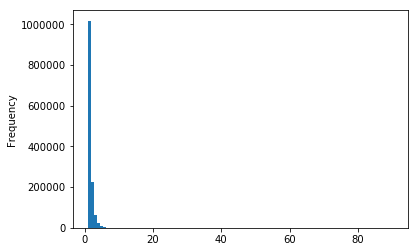

In [34]:
data.Number_of_Casualties.plot.hist(bins = 100)

In [19]:
data["Light_Conditions"].unique()

array([ 1,  6,  4,  5,  7, -1])

In [29]:
data.Number_of_Vehicles.unique()

array([ 1,  2,  4, 10,  3,  5,  6, 15, 20,  8,  9, 21,  7, 24, 11, 14, 12,
       18, 16, 13, 19, 17, 26, 22, 32, 23, 40, 31, 66])

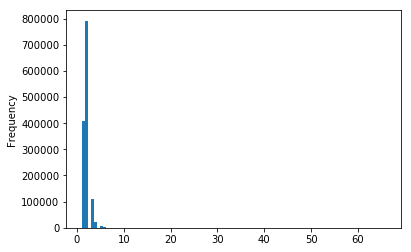

In [28]:
data.Number_of_Vehicles.plot.hist(bins = 100)

## Let's limit ourselves to the following columns:

* `Longitude`
* `Latitude`
* `Time`
* `Number_of_Casualites`

In [35]:
data = pd.read_csv(os.path.join(DATADIR, "Accidents7904.csv"),
                   usecols=['Longitude',"Latitude",
                            "Date", "Time","Number_of_Casualties"],
                   skiprows = lambda index: index >0 and index <=4883216 )
                   
                        

In [36]:
data.head()

,Longitude,Latitude,Number_of_Casualties,Date,Time
0,-0.271752,51.715661,1,25/12/1999,09:30
1,-0.239977,51.695136,1,17/12/1999,18:38
2,-0.270037,51.715096,2,15/12/1999,18:04
3,-0.263233,51.711309,1,02/12/1999,04:10
4,-0.227225,51.688200,3,04/12/1999,09:51


In [37]:
data.shape

(1340982, 5)

### We can drop missing values

In [38]:
data2 = data.dropna()

In [39]:
data2.shape

(1336875, 5)

In [40]:
type(data2.iloc[0,3])

str

In [41]:
type(data2.loc[0,"Time"])

str

#### Date's and Times are not recognized as such and so are left as strings

* We could set `locale`
* Or we can convert later

In [43]:
data2["Date"] = pd.to_datetime(data2["Date"],format="%d/%m/%Y", 
                              errors='ignore')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
data2.Date[0]

Timestamp('1999-12-25 00:00:00')

In [47]:
data2.Time ##24hours

0          09:30
1          18:38
2          18:04
3          04:10
4          09:51
5          00:30
6          08:00
7          01:40
8          08:35
9          17:35
10         17:00
11         08:20
12         18:00
13         16:51
14         00:48
15         08:55
16         10:11
17         11:52
18         08:24
19         11:01
20         16:45
21         15:45
22         08:33
23         12:31
24         16:13
25         16:20
26         08:05
27         17:55
28         12:04
29         11:55
           ...  
1340952    11:24
1340953    20:05
1340954    15:08
1340955    07:41
1340956    08:24
1340957    11:19
1340958    10:00
1340959    10:33
1340960    07:19
1340961    05:50
1340962    21:07
1340963    12:47
1340964    19:27
1340965    19:03
1340966    17:08
1340967    07:50
1340968    06:48
1340969    09:59
1340970    18:46
1340971    09:15
1340972    14:17
1340973    22:09
1340974    19:20
1340975    21:10
1340976    13:00
1340977    08:22
1340978    06:54
1340979    06:

In [48]:
from datetime import datetime
tmp = datetime.strptime("09:30","%H:%M")
print(tmp.time())

09:30:00


In [49]:
data2["Time"] = data2.apply(lambda row: datetime.strptime(row["Time"],"%H:%M").time(), 
                            axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
data2.head()

,Longitude,Latitude,Number_of_Casualties,Date,Time
0,-0.271752,51.715661,1,1999-12-25,09:30:00
1,-0.239977,51.695136,1,1999-12-17,18:38:00
2,-0.270037,51.715096,2,1999-12-15,18:04:00
3,-0.263233,51.711309,1,1999-12-02,04:10:00
4,-0.227225,51.688200,3,1999-12-04,09:51:00


####  We can use the [``sample``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) method to get a subset of DataFrame

In [61]:
subdata = data2.sample(2000)
mean_long = np.mean(subdata['Longitude'])
mean_lat  = np.mean(subdata['Latitude'])


In [56]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(branca.element.MacroElement)
 |  Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, png_enabled=False, zoom_control=True, **kwargs)
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must pass API key)
 |      - "Ma

In [57]:
map = folium.Map(location=[mean_lat, mean_long], 
                 tiles="Stamen Terrain", zoom_start=5.5)
for _, s in subdata.iterrows():
    rslt = folium.Marker([s["Latitude"], s["Longitude"]],
                  popup="%s\n%s\n# Causalities: %d"%(s["Date"],
                                                     s["Time"],
                                                     s["Number_of_Casualties"]),
                  icon=folium.Icon(icon='cloud')).add_to(map)
map

casuality를 기준으로 등고선 형태로 그려볼 것.

### Example 2

* Filter Pandas DataFrame on number of casualties
* Select different [Bootstrap icon](https://www.w3schools.com/icons/bootstrap_icons_glyphicons.asp)
* Set different color

In [58]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
from IPython.display import display

In [63]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(branca.element.MacroElement)
 |  Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, png_enabled=False, zoom_control=True, **kwargs)
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must pass API key)
 |      - "Ma

[font_examples](https://www.w3schools.com/icons/fontawesome5_icons_animals.asp)

In [62]:
subdata = data2.sample(100)
mean_long = np.mean(subdata['Longitude'])
mean_lat  = np.mean(subdata['Latitude'])
tiles = ["OpenStreetMap", "Mapbox Bright", "Mapbox Control Room", 
         "Stamen Terrain", "Stamen Toner", "Stamen Watercolor", 
         "CartoDB positron","CartoDB dark_matter"]
@interact(num_cas=IntSlider(min=1, ##decorator로 부른다.
                            max=subdata.Number_of_Casualties.max(), 
                            value=subdata.Number_of_Casualties.max()), 
          data2 = fixed(subdata), 
          loclat = fixed(mean_lat), 
          tile=tiles,
          loclon=fixed(mean_long))
def plot_accidents(data2, num_cas, loclat, loclon, tile):
    map2 = folium.Map(location=[loclat, loclon], 
                     tiles=tile, zoom_start=5.5)
    for _, s in data2[data2["Number_of_Casualties"]>=num_cas].iterrows():
        rslt = folium.Marker([s["Latitude"], s["Longitude"]],
                      popup="%s\n%s\n# Causalities: %d"%(s["Date"],
                                                         s["Time"],
                                                         s["Number_of_Casualties"]),
                      icon=folium.Icon(icon="fa-ambulance", color='red', prefix="fa"),
                            tooltip = 'Click for accident details').add_to(map2)
    display(map2)

interactive(children=(IntSlider(value=11, description='num_cas', max=11, min=1), Dropdown(description='tile', …

In [67]:
import datetime

In [70]:
start_time = datetime.time(0)
end_time = datetime.time(3)

In [71]:
end_time > start_time

True

In [73]:
data2.head()

,Longitude,Latitude,Number_of_Casualties,Date,Time
0,-0.271752,51.715661,1,1999-12-25,09:30:00
1,-0.239977,51.695136,1,1999-12-17,18:38:00
2,-0.270037,51.715096,2,1999-12-15,18:04:00
3,-0.263233,51.711309,1,1999-12-02,04:10:00
4,-0.227225,51.688200,3,1999-12-04,09:51:00


In [91]:
data2[(data2.Time < end_time) | (data2.Time > datetime.time(23) )].shape

(81315, 5)

In [ ]:
subdata = data2[(data2.Time < end_time) | (data2.Time > datetime.time(23) )].sample(100)
map = folium.Map(location=[mean_lat, mean_long], 
                 tiles="Stamen Terrain", zoom_start=5.5)
for _, s in subdata.iterrows():
    rslt = folium.Marker([s["Latitude"], s["Longitude"]],
                  popup="%s\n%s\n# Causalities: %d"%(s["Date"],
                                                     s["Time"],
                                                     s["Number_of_Casualties"]),
                  icon=folium.Icon(icon='cloud')).add_to(map)
map